## Part1: Exploratory Data Analysis(EDA)

In [336]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [337]:
df = pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [338]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age, Cabin and Embarked have null values. I will try to fix them.

### How many survived?

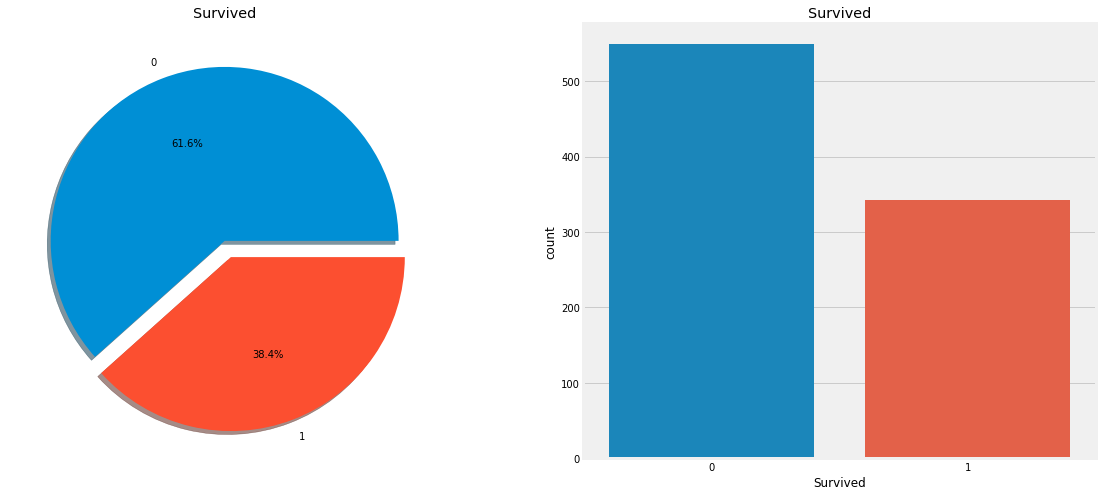

In [339]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df["Survived"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only __38.4%__ of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

### Type Of Features

#### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

__Categorical Features in the dataset: Sex,Embarked.__

#### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

__Ordinal Features in the dataset: PClass__

#### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

__Continous Features in the dataset: Age__

### Analysing The Features

### SEX → Categorical Feature

In [340]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex:Survived vs Dead')

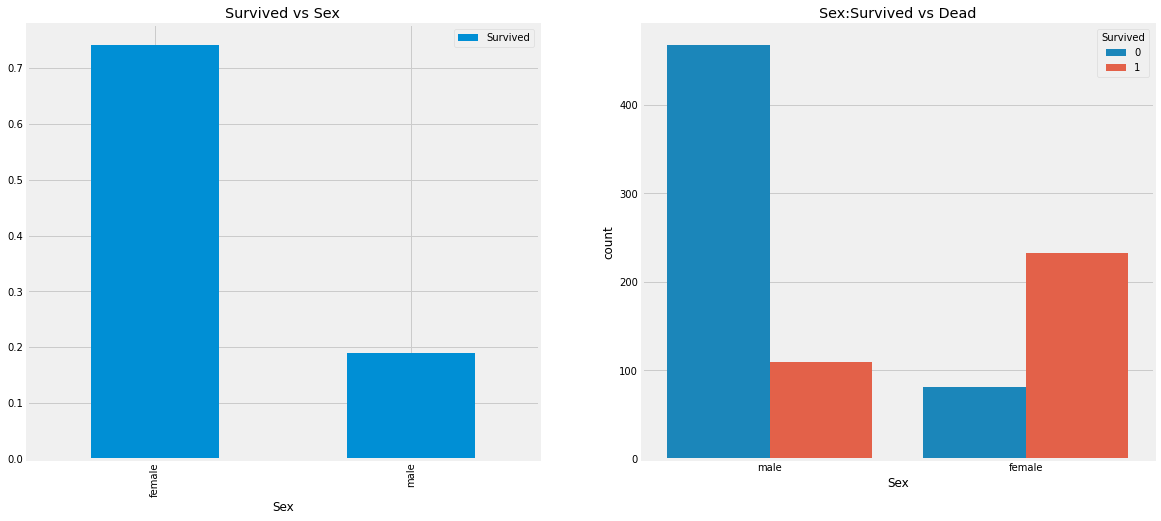

In [341]:
f,ax = plt.subplots(1, 2, figsize=(18,8))

# 1st graph
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])  # df[['Sex', 'Survived']].groupby(['Sex']).mean() : 성별에 따른 생존율 계산
ax[0].set_title('Survived vs Sex')

# 2nd graph
sns.countplot('Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a __women on the ship is around 75% while that for men in around 18-19%.__

This looks to be a __very important__ feature for modeling. But is it the best?? Lets check other features.

### Pclass --> Ordinal Feature

In [342]:
# crosstab(엑셀에서는 피벗테이블 혹은 직접 셀에 입력해서 노가다로 만들어주어야 함)
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='summer_r')
# margins=True : sum data(ALL) 추가

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

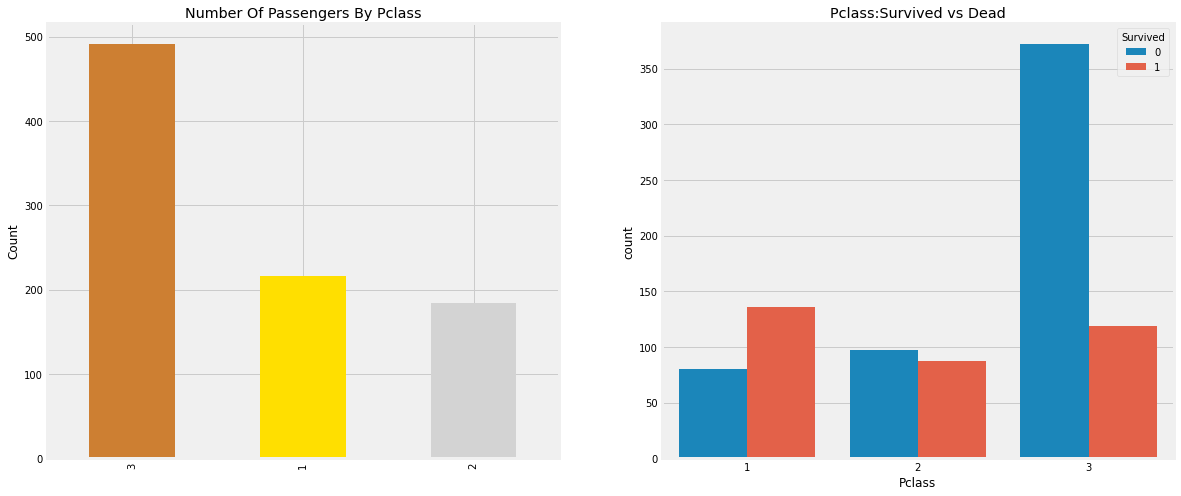

In [343]:
f,ax = plt.subplots(1, 2, figsize=(18,8))  # (18,8) size의 (1,2) subplots 생성

# 1st graph
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])  # Pclass 값을 barplot으로 시각화
ax[0].set_title('Number Of Passengers By Pclass')  # 첫번째 그래프 title
ax[0].set_ylabel('Count')   # 첫번째 그래프 y축 label
# ax[0].set_xlabel('Pclass')  # 첫번째 그래프 x축 label

# 2nd graph
sns.countplot('Pclass', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')  # 두번째 그래프 title
#? seaborn 사용 시 graph의 xlabel, ylabel 자동으로 그려 주는 것?

People say __Money Can't Buy Everything.__ But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.    

For Pclass 1 %survived is around __63%__ while for Pclass2 is around __48%.__ So money and status matters. Such a materialistic world.    

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with __Sex and Pclass__ Together.

In [344]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='summer_r')

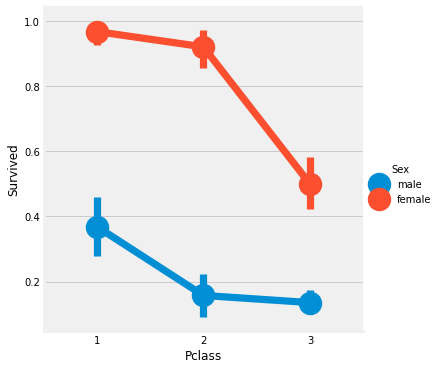

In [345]:
sns.factorplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.show()

We use __FactorPlot__ in this case, because they make the seperation of categorical values easy.

Looking at the __CrossTab__ and the __FactorPlot__, we can easily infer that survival for __Women from Pclass1__ is about __95-96%__, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

### Age --> Continous Feature

In [346]:
print('Oldest Passenger was of:',df['Age'].max(),'Years')    # 승객 중 최고령자의 나이
print('Youngest Passenger was of:',df['Age'].min(),'Years')  # 승객 중 최연소자의 나이
print('Average Age on the ship:',df['Age'].mean(),'Years')   # 승객 평균 연령

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


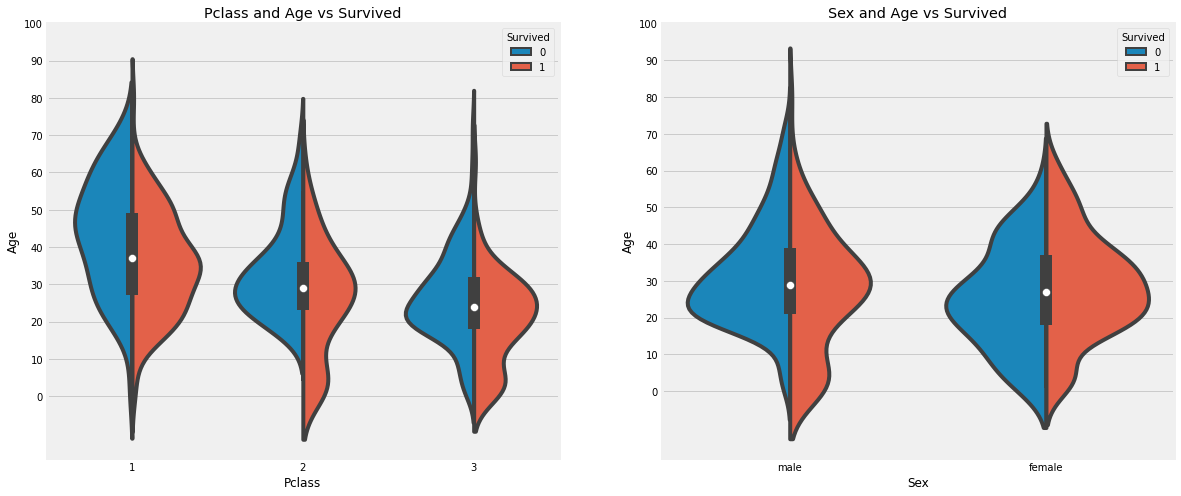

In [347]:
f,ax = plt.subplots(1, 2, figsize=(18,8))

# 1st graph
sns.violinplot(data=df, x='Pclass', y='Age', hue="Survived", split=True, ax=ax[0])  # violinplot 시각화  
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))  # yticks : y축 간격을 표시하기 위한 눈금 설정

# 2nd graph
sns.violinplot(data=df, x='Sex', y='Age', hue="Survived", split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

#? violinplot parameter(split=True)
#? violinplot 해석

__Observations:__  
1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has __177__ null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

__Bingo!!!!__, we can check the __Name__ feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

__''What's In A Name??''---> Feature__ :p

In [348]:
df['Initial'] = 0  # Initial 컬럼을 생성하고 값을 0으로 채운다.
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')  # 정규표현식을 사용해 extract the Salutations(e.g. Mr/Miss/Mrs)

In [349]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Okay so here we are using the Regex: [A-Za-z]+).. So what it does is, it looks for strings which lie between __A-Z or a-z__ and followed by a __.(dot)__. So we successfully extract the Initials from the Name.

In [350]:
pd.crosstab(df.Initial, df.Sex).T.style.background_gradient(cmap='summer_r')  # T(Transpos) 사용
# pd.crosstab(df.Sex, df.Initial).style.background_gradient(cmap='summer_r') 동일한 결과 값 반환

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like __Mlle__ or __Mme__ that stand for Miss. I will replace them with Miss and same thing for other values.

In [351]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                      inplace=True)  # inplace=True 전처리 시 좋은 방법은 아닌 것 같으므로 가급적 지양하는 게 좋을 것 같

In [352]:
df.groupby('Initial')['Age'].mean()  # 이니셜 기준 평균 나이 계산

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

__Filling NaN Ages__

In [353]:
## Assigning the NaN Values with the Ceil values of the mean ages
df.loc[(df.Age.isnull()) & (df.Initial=='Mr'), 'Age'] = 33  # row : Age==null & Initial=='Mr', columns : 'Age'
df.loc[(df.Age.isnull()) & (df.Initial=='Mrs'), 'Age'] = 36
df.loc[(df.Age.isnull()) & (df.Initial=='Master'), 'Age'] = 5
df.loc[(df.Age.isnull()) & (df.Initial=='Miss'), 'Age'] = 22
df.loc[(df.Age.isnull()) & (df.Initial=='Other'), 'Age'] = 46

In [354]:
df.Age.isnull().any()  # any() : iterable(반복 가능한 자료형) 내 element 중 하나라도 True인지 확인하는 함수

False

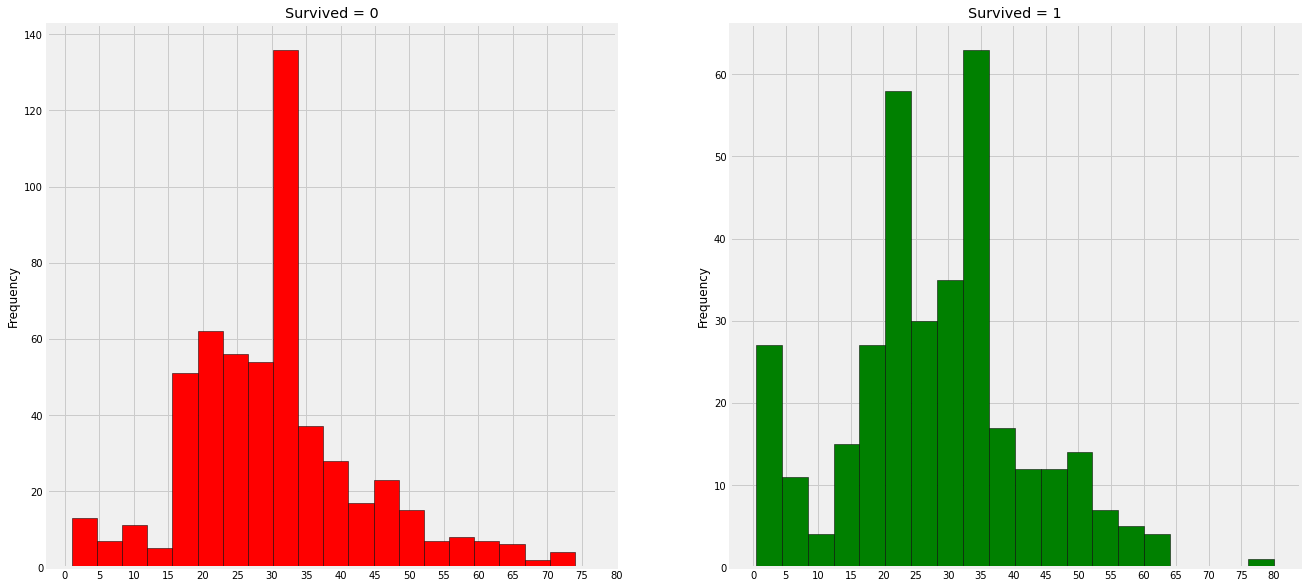

In [355]:
f,ax = plt.subplots(1, 2, figsize=(20,10))

# 1st graph
df[df['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, color='red', edgecolor='black')  # bins : 히스토그램의 그래프 영역을 20개로 나누기
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)  # xticks를 x1으로 만들기 = ax[0].set_xticks(range(0, 85, 5))

# 2nd graph
df[df['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

__Observations:__  
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

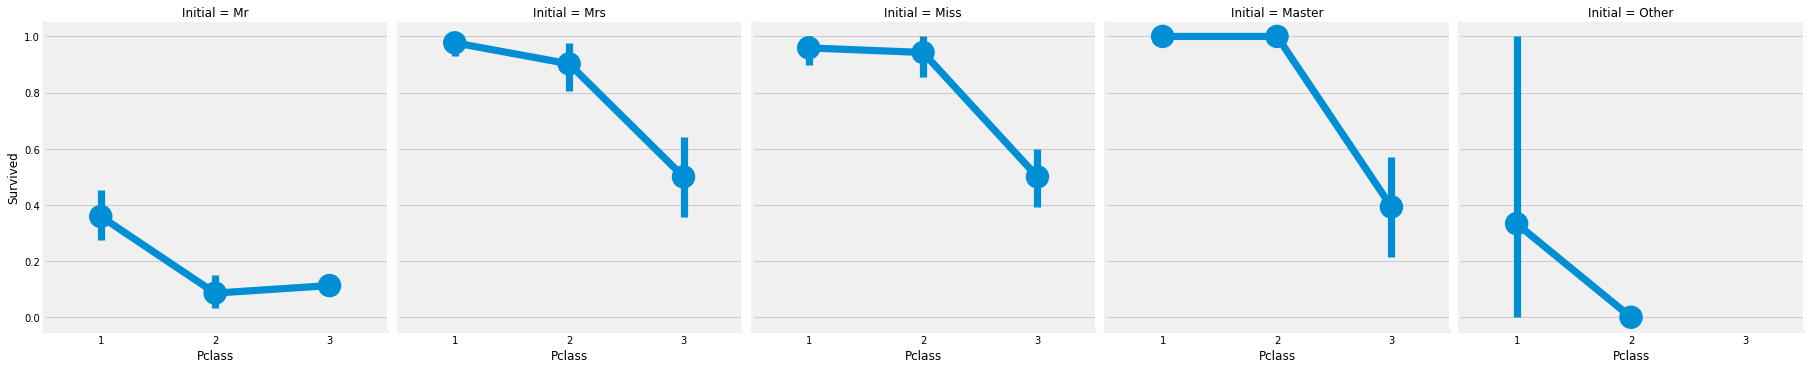

In [356]:
sns.factorplot(data=df, x='Pclass', y='Survived', col='Initial')  # col : Initial 컬럼값별 시각화
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

### Embarked --> Categorical Value

In [357]:
pd.crosstab([df.Embarked, df.Pclass],[df.Sex, df.Survived], margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port Of Embarkation

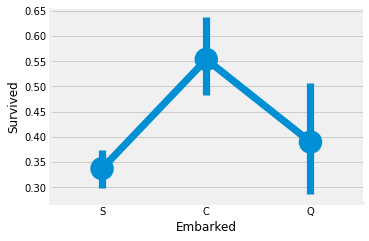

In [358]:
sns.factorplot(data=df, x='Embarked', y='Survived')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()
#? set_size_inches()과 figsize=(,) 동일한 것?

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

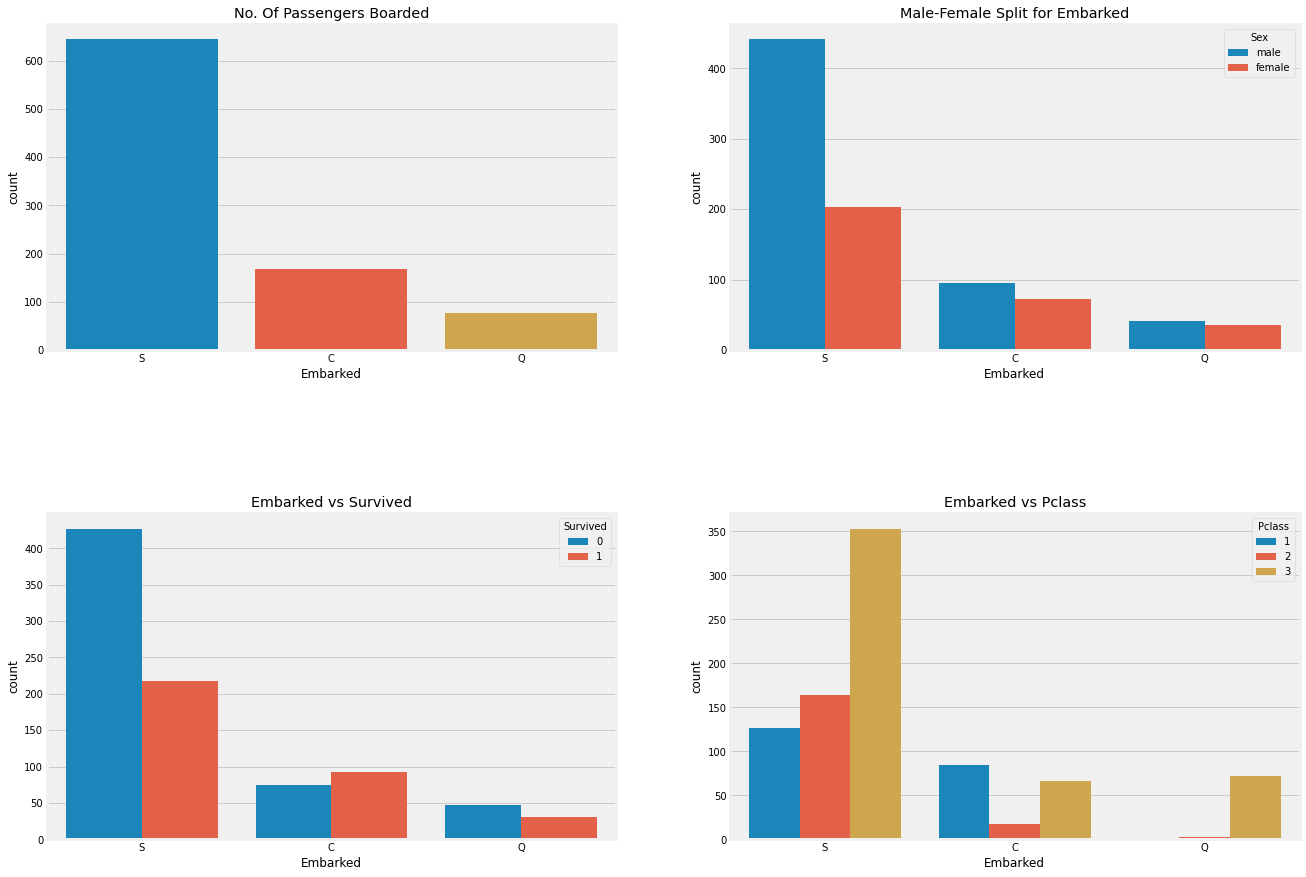

In [359]:
f,ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot(data=df, x='Embarked', ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(data=df, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(data=df, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(data=df, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()
#? plt.subplots_adjust(wspace=0.2,hspace=0.5)

__Observations:__  
1) Maximum passenegers boarded from S. Majority of them being from Pclass3.

2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3) The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around __81% didn't survive.__

4) Port Q had almost 95% of the passengers were from Pclass3.

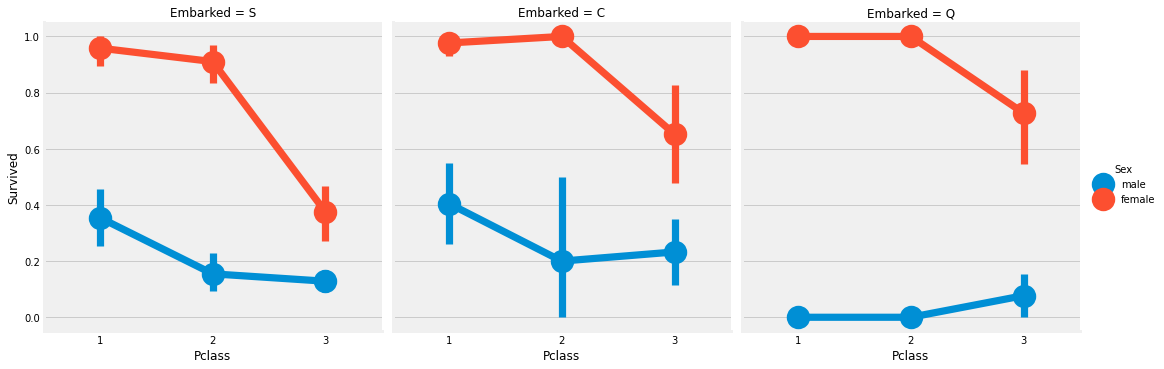

In [360]:
sns.factorplot(data=df, x='Pclass', y='Survived', hue='Sex', col='Embarked')
plt.show()

__Observations:__  
1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2)Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low. __(Money Matters)__

3)Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

__Filling Embarked NaN__  
As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [361]:
df['Embarked'].fillna('S', inplace=True)

In [362]:
df.Embarked.isnull().any() # Finally No NaN values(null values cross-chceck)

False

### SibSip-->Discrete Feature
This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [363]:
pd.crosstab([df.SibSp], df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


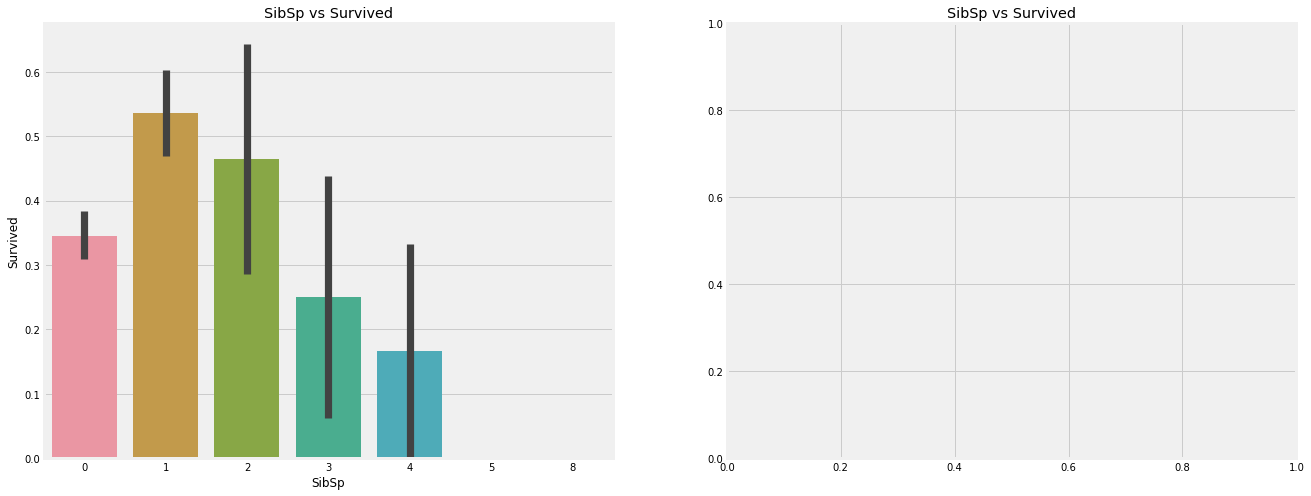

In [364]:
f,ax = plt.subplots(1, 2, figsize=(20,8))

# 1st graph
sns.barplot(data=df, x='SibSp', y='Survived', ax=ax[0])
ax[0].set_title('SibSp vs Survived')

# 2nd graph
sns.factorplot(data=df, x='SibSp', y='Survived')
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [365]:
pd.crosstab(df.SibSp, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


__Observations:__  
The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is __0%.__ The reason may be Pclass??

The reason is __Pclass.__ The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

### Parch

In [366]:
pd.crosstab(df.Parch, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

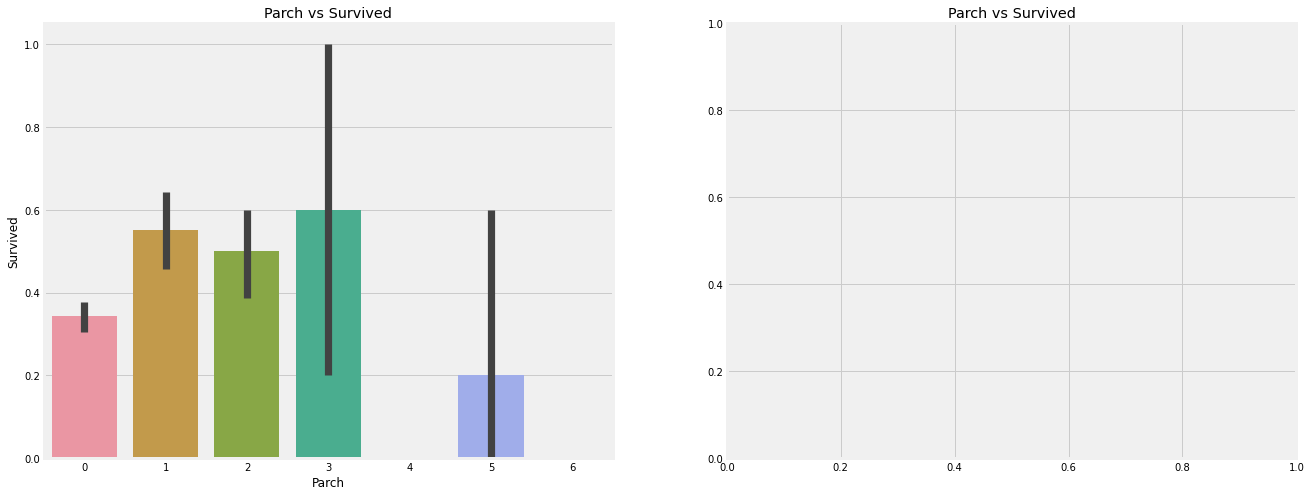

In [367]:
f,ax = plt.subplots(1, 2, figsize=(20,8))

# 1st graph
sns.barplot(data=df, x='Parch', y='Survived', ax=ax[0])
ax[0].set_title('Parch vs Survived')

# 2nd graph
sns.factorplot(data=df, x='Parch', y='Survived')
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

__Observations:__  
Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

### Fare --> Continous Feature

In [368]:
print('Highest Fare was:', df['Fare'].max())   # 가장 비싼 운임요금
print('Lowest Fare was:', df['Fare'].min())    # 가장 저렴한 운임요금
print('Average Fare was:', df['Fare'].mean())  # 평균 운임요금

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is 0.0. Wow!! a free luxorious ride.

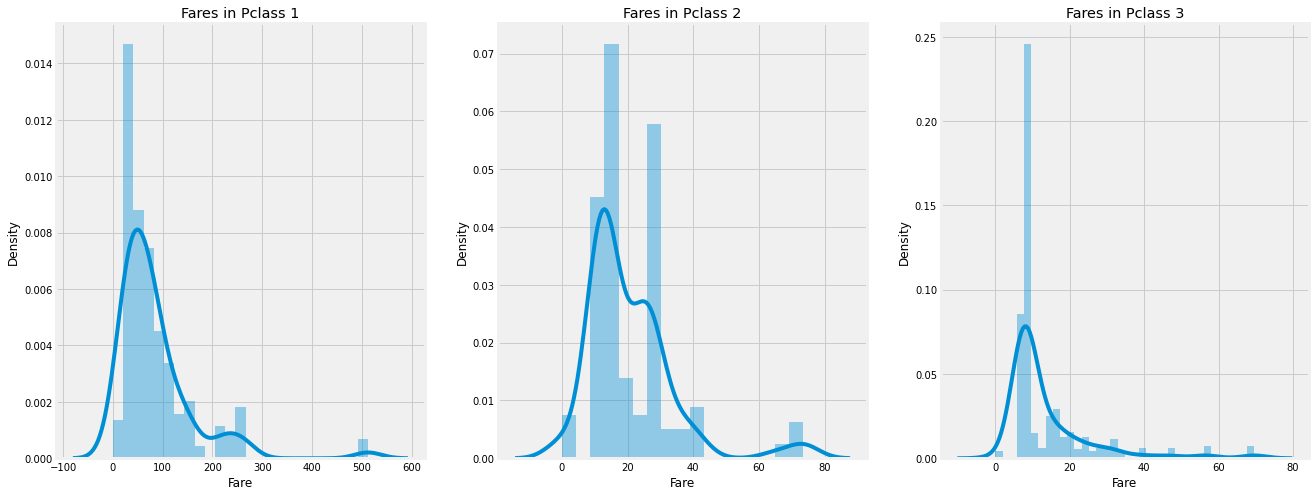

In [369]:
f,ax=plt.subplots(1, 3, figsize=(20,8))

# 1st graph
sns.distplot(df[df['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

# 2nd graph
sns.distplot(df[df['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

# 3rd graph
sns.distplot(df[df['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

### Observations in a Nutshell for all features:
__Sex:__ The chance of survival for women is high as compared to men.

__Pclass:__ There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

__Age:__ Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

__Embarked:__ This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

__Parch+SibSp:__ Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

### Correlation Between The Features

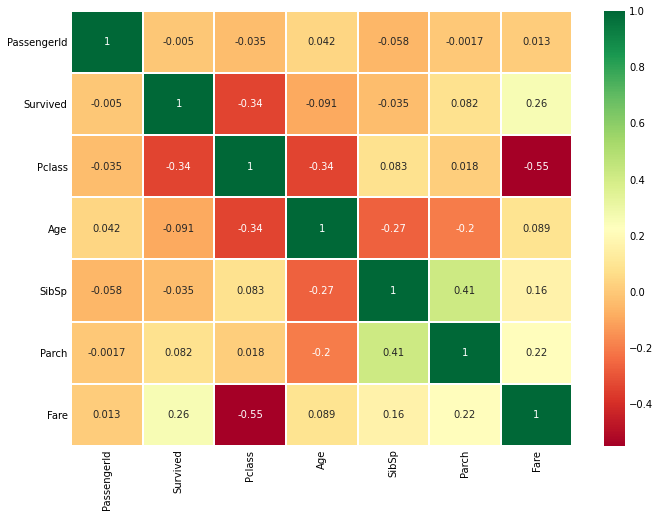

In [370]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)  # df.corr() : correlation matrix
fig = plt.gcf()  #? plt.gcf()는 어떤 기능적 역할을 할까
fig.set_size_inches(10,8)
plt.show()

__Interpreting The Heatmap__  
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

__POSITIVE CORRELATION:__ If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

__NEGATIVE CORRELATION:__ If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

## Part2: Feature Engineering and Data Cleaning
Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

### Age_band

Problem With Age Feature:
As I have mentioned earlier that Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.

Eg:If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [371]:
df['Age_band'] = 0
df.loc[df['Age'] <= 16, 'Age_band'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age_band'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age_band'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age_band'] = 3
df.loc[df['Age'] > 64, 'Age_band'] = 4
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [372]:
df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')  # checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


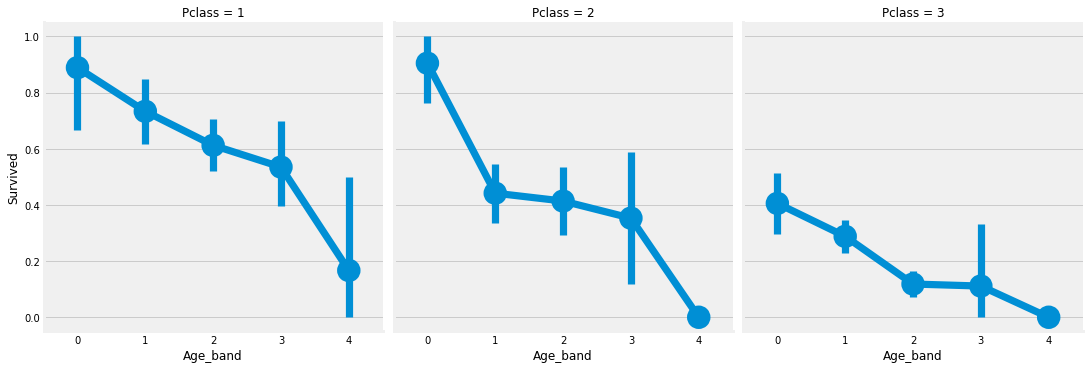

In [373]:
sns.factorplot(data=df, x='Age_band', y='Survived', col='Pclass')
plt.show()

True that..the survival rate decreases as the age increases irrespective of the Pclass.

### Family_Size and Alone
At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [374]:
df['Family_Size'] = 0
df['Family_Size'] = df['Parch'] + df['SibSp']  # family size
df['Alone'] = 0
df.loc[df.Family_Size==0, 'Alone'] = 1  # Alone

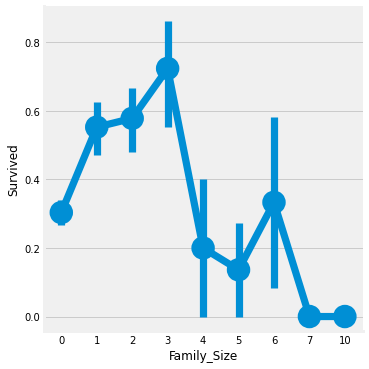

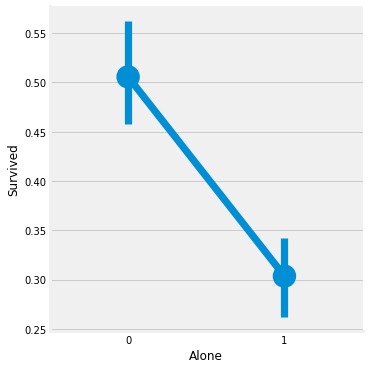

In [375]:
# f,ax = plt.subplots(1, 2, figsize=(18,6))

# 1st graph
sns.factorplot(data=df, x='Family_Size', y='Survived', ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

# 2nd graph
sns.factorplot(data=df, x='Alone', y='Survived', ax=ax[1])
ax[1].set_title('Alone vs Survived')

# plt.close(2)
# plt.close(3)
plt.show()

__Family_Size=0 means that the passeneger is alone.__ Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

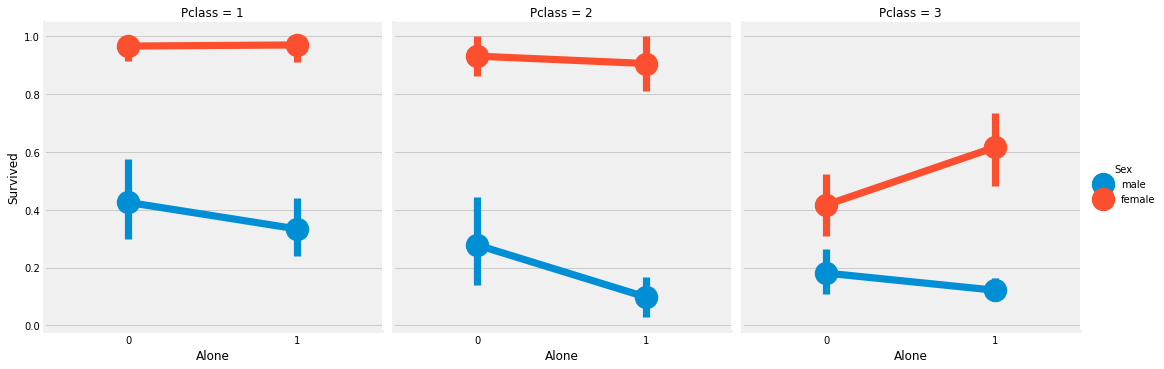

In [376]:
sns.factorplot(data=df, x='Alone', y='Survived', hue='Sex', col='Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

### Fare_Range
Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [377]:
df["Fare_Range"] = pd.qcut(df["Fare"], 4)  # qcut / cut 
df.groupby(["Fare_Range"])["Survived"].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the __fare_range increases, the chances of survival increases.__

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in __Age_Band__

In [378]:
df['Fare_cat'] = 0
df.loc[df['Fare'] <= 7.91, 'Fare_cat'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare_cat'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare_cat'] = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 513), 'Fare_cat'] = 3
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


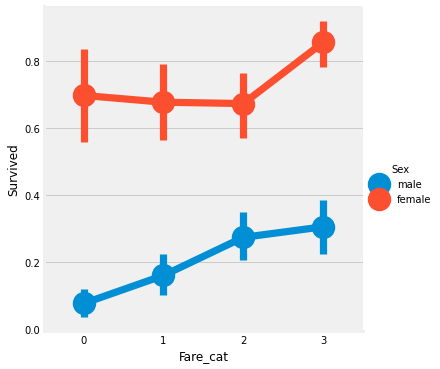

In [379]:
sns.factorplot(data=df, x='Fare_cat', y='Survived', hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### Converting String Values into Numeric
Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [380]:
df['Sex'].replace(['male','female'], [0,1], inplace=True)
df['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
df['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

__Dropping UnNeeded Features__

__Name:__ We don't need name feature as it cannot be converted into any categorical value.

__Age:__ We have the Age_band feature, so no need of this.

__Ticket:__ It is any random string that cannot be categorised.

__Fare:__ We have the Fare_cat feature, so unneeded

__Cabin:__ A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

__Fare_Range:__ We have the fare_cat feature.

__PassengerId:__ Cannot be categorised.

In [381]:
df.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)  
# inplace=True 대신 df 변수에 다시 담아줘도 된다. 

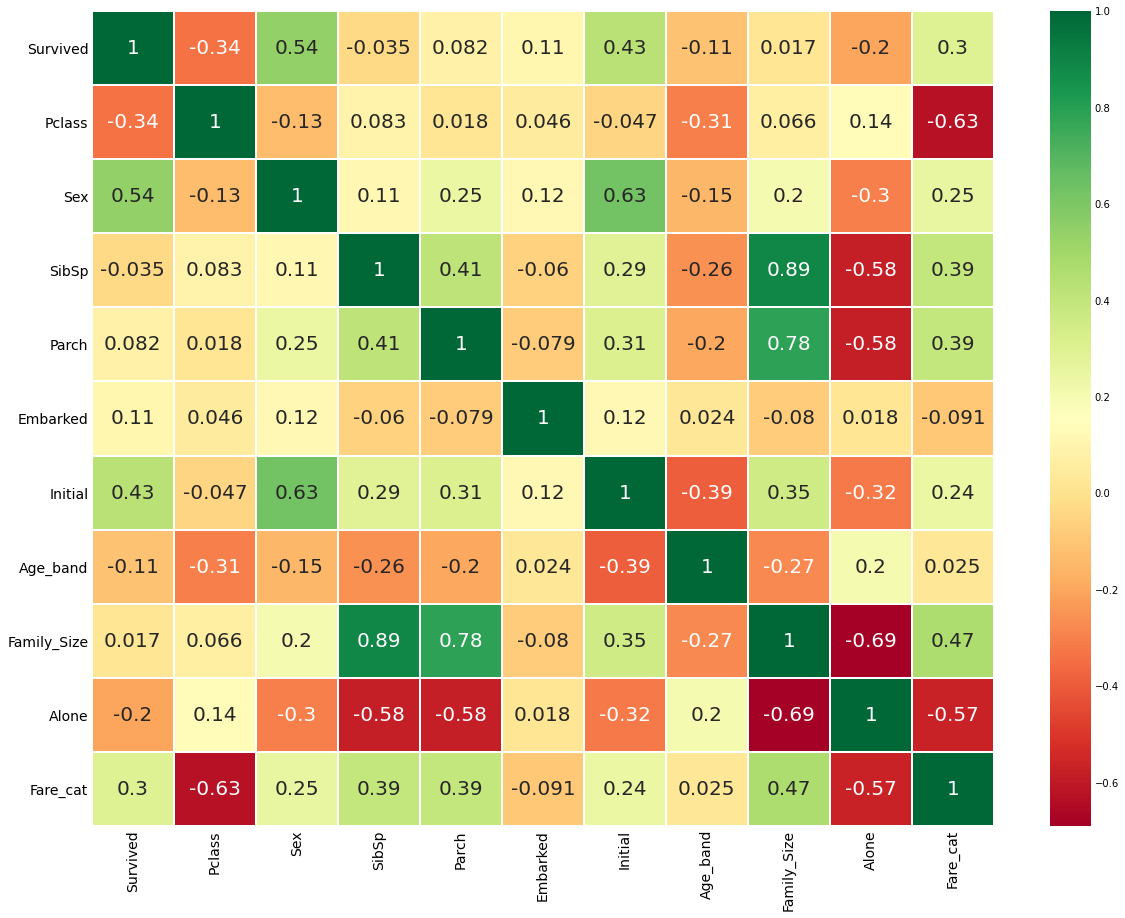

In [382]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being __SibSp andd Family_Size__ and Parch and Family_Size and some negative ones like __Alone and Family_Size.__